<a href="https://colab.research.google.com/github/aida-wofford/astronomia-observacional/blob/main/Manipulacion_espectros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica: obtención y manipulación del espectro óptico de una galaxia del sondeo Sloan Digital Sky Survey (SDSS).
## Objetivos específicos de la práctica.   
* Puedo usar métodos manuales y automáticos para bajar de bases astronómicas de datos el espectro de una galaxia, su corrimiento al rojo, y su exceso de color debido al polvo en la Vía Láctea.
* Puedo corregir el espectro de la galaxia por polvo en la Vía Láctea.
* Puedo ajustar y sustraer el continuo del espectro de la galaxia. 
* Puedo medir las propiedades de algunas líneas conocidas del espectro de la galaxia.
* Puedo determinar el corrimiento al rojo de la galaxia.
* Puedo corregir el espectro de la galaxia por corrimiento al rojo.

# Detalles sobre este notebook de python.

In [1]:
__author__ = 'Aida Nava de Wofford <awofford@astro.unam.mx>, Sundar Srinivasan <s.srinivasan@irya.unam.mx>'
__version__ = '20211125'
__datasets__ = ['SDSS']  # datos usados en este notebook
__keywords__ = ['Curso de Astronomía Observacional 2021', 'SDSS', 'espectro'], # palabras clave relevantes a este notebook

# Instalación de versiones necesarias de dependencias.
## Dar click a "RESTART RUNTIME" al final de la instalación y proseguir con la práctica.

In [2]:
!pip install --force-reinstall jsonschema==3.2.0

     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 119 kB 34.7 MB/s 
     |████████████████████████████████| 952 kB 49.7 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
  Attempting uninstall: zipp
    Found existing installation: zipp 3.6.0
    Uninstalling zipp-3.6.0:
      Successfully uninstalled zipp-3.6.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pyrsistent
    Found existing installation: pyrsistent 0.18.0
    Uninstalling pyrsis

# Instalación de módulos de python necesarios, en este caso numpy y "SDSS" de la biblioteca de astroquery.

* "numpy" es un módulo de Python que se utiliza para trabajar con matrices.También tiene funciones para trabajar en el dominio del álgebra lineal, la transformada de Fourier y las matrices.
* "astroquery" es un conjunto de herramientas para consultar bases de datos y formularios web astronómicos.


In [1]:
import warnings, numpy as np
warnings.filterwarnings("ignore", category = np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
try:
  from astroquery.sdss import SDSS
except:
  !pip install astroquery
  from astroquery.sdss import SDSS

     |████████████████████████████████| 4.5 MB 12.9 MB/s 
     |████████████████████████████████| 802 kB 53.6 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 3.6 MB 33.4 MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=1ef5a65f9da665418a4c4d42eaaf963587eca6970e161ec6f0d86936dd11f5de
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built mimeparse


# Reducción de datos.
* Cuando uno baja espectros de la plataforma del SDSS, estos ya están  reducidos y listos para hacer ciencia. 
* **Leer acerca del proceso de reducción de datos en la sección 4.10.1 del siguiente artículo:** https://iopscience.iop.org/article/10.1086/324741/fulltext/
* **¿Cuáles son los pasos de la reducción de datos seguidos para los espectros de SDSS?**

RESPUESTA:

## Método manual de obtención de las coordenadas del objeto.
* Para bajar el espectro de SDSS de la galaxia, necesitamos sus coordenadas (RA, Dec) o (longitude, latitude) en el sistema de referencia Equatorial (J2000.0). 
* **Encuentra las coordenadas de la galaxia usando su nombre en la  base de datos de NED (https://ned.ipac.caltech.edu/). El nombre de la galaxia que utilizaremos en esta práctica es: KISSR 298.**

* **Asigna a las variables de abajo las coordenadas del objecto que encontraste.**

RESPUESTA:

In [7]:
RA_manual=0 # longitude in Equatorial J2000
Dec_manual=0 # latitude in Equatorial J2000

* Nota: los métodos manuales tienen la desventaja de que uno comete errores al teclear. Aprendamos entonces a usar el método automático.

## Método manual de obtención de: ID de la placa de SDSS, fecha de observación y fibra.

* Para bajar el espectro de SDSS de la galaxia, son necesarios: el ID de la placa, fecha de observación y número de la fibra utilizada para obtener el espectro. 
* En la plataforma del SDSS Data Release 14 (https://skyserver.sdss.org/dr14/en/tools/chart/chartinfo.aspx), busca la galaxia usando las coordenadas que encontraste. 
* Dále a "Get Image" para ver la imagen del objeto. Puedes cambiar el tamaño de la imagen con los botones de "+" y "-".
* Haz click en "Explore" para ir a donde se encuentra el espectro. 
* Abajo a la derecha, en donde dice "Interactive Spectrum", hay una tabla con información sobre las observaciones del objeto. 
* Asigna a las variables de abajo las coordenadas del objecto que encontraste.


RESPUESTA: 






In [8]:
plate_manual=-1 # plate
mjd_manual=-1 # modified Julian date
fiberid_manual=-1 # fiberid

* Armemos el nombre del camino que lleva al espectro.

In [9]:
archivo_con_espectro_man = 'https://dr14.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid='+str(plate_manual)+'&mjd='+str(mjd_manual)+'&fiberid='+str(fiberid_manual)
print(archivo_con_espectro_man)

https://dr14.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=-1&mjd=-1&fiberid=-1


## Método automático de obtención de las coordenadas del objeto.
* Las bases de datos astronómicas tienen un servicio de "busqueda por nombre".
* Utilizaremos el módulo `coords` para buscar de manera automática las coordenadas a partir del nombre del objeto.
* SkyCoord consulta la base de datos CDS (http://cdsweb.u-strasbg.fr/) para encontrar las coordenadas del objeto.
* Comenzamos importando el módulo necesario para bajar las coordenadas.


In [10]:
from astropy import coordinates as coords
pos = coords.SkyCoord.from_name("KISSR 298") #pos variable para la posición del objeto.
print("position: ", pos)

position:  <SkyCoord (ICRS): (ra, dec) in deg
    (202.457448, 29.579719)>


* **Verifica que las coordenadas son las mismas que las que encontraste manualmente.**

In [11]:
print(RA_manual, Dec_manual)

0 0


## Método automático de obtención de los IDs de la placa, fecha y fibra.
* Una vez que tenemos las coordenadas del objeto, buscamos en la base de datos de SDSS de manera automática los IDs que indican la placa con que se tomó el espectro, la fecha de observación y la fibra correspondiente a la posición del objeto usando los siguientes comandos:

In [12]:
tabla_sdss = SDSS.query_region(pos, spectro = True)
plate = tabla_sdss[0][list(tabla_sdss.columns).index('plate')]
mjd = tabla_sdss[0][list(tabla_sdss.columns).index('mjd')]
fiberID = tabla_sdss[0][list(tabla_sdss.columns).index('fiberID')]

* Con estos parámetros podemos buscar el espectro.

In [13]:
sp = SDSS.get_spectra(matches = tabla_sdss, plate = plate, mjd = mjd, fiberID = fiberID)[0]

* El espectro está en el segundo encabezado del archivo (sp[1])


In [14]:
specdata = sp[1].data
print(specdata)

[(13.479021, 3.5816, 0.06797916, 0, 0, 1.1088611 , 9.002381, 13.217207)
 (19.215475, 3.5817, 0.06977836, 0, 0, 1.108475  , 9.212716, 13.737914)
 (14.267138, 3.5818, 0.07592517, 0, 0, 1.108091  , 9.300478, 13.168895)
 ...
 ( 8.162261, 3.9645, 0.35342726, 0, 0, 0.7729795 , 4.512267, 12.689797)
 (11.752623, 3.9646, 0.        , 0, 0, 0.77300555, 4.811207, 12.891481)
 (15.343176, 3.9647, 0.28280747, 0, 0, 0.77303153, 4.932665, 12.677738)]


* Importamos el módulo necesario para guardar las unidades de longitud de onda y flujo.

In [15]:
from astropy import units as u


* Abrimos el archivo y construimos los vectores de longitudes de onda (wave),  flujos (flux), y de errores en los flujos (err).

In [16]:
wave = 10**specdata['loglam'] * u.AA # longitud de onda
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') # flujo
#ivar = specdata['ivar']# inverso de la varianza
#err = 1 / np.sqrt(ivar) # error * u.Unit('erg cm-2 s-1 AA-1') # error en el flujo

* Importamos el módulo para graficar (matplotlib).

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

# Método manual de poner unidades en los ejes de las gráficas.
* Poner las unidades de los ejes de manera manual en las gráficas puede llevar a errores. 
* **¿Qué errores notas en las unidades de los ejes de la gráfica de abajo (compara con la gráfica del método automático de más abajo)?**

RESPUESTA:

''

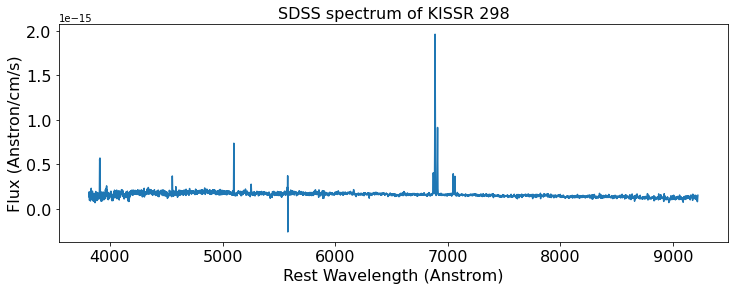

In [18]:
f, ax = plt.subplots(figsize = (12, 4))
ax.plot(wave, flux)
plt.xlabel('Rest Wavelength (Anstrom)', fontsize = 16)
plt.ylabel('Flux (Anstron/cm/s)', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('SDSS spectrum of KISSR 298', fontsize = 16)
;

## Método automático de poner las unidades en la gráfica.

* Instalamos el paquete specutils que permite poner las unidades correctas en los ejes de la gráfica del espectro (specutils) y las dependencias necesarias.

In [19]:
!pip install specutils

     |████████████████████████████████| 190 kB 12.9 MB/s 
     |████████████████████████████████| 108 kB 68.1 MB/s 
     |████████████████████████████████| 489 kB 70.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 184 kB 53.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for asdf: filename=asdf-2.8.1-py3-none-any.whl size=632306 sha256=0a19a140d970df910f680baeaba789826d479dcff187af2e38f21ccc3e829fc6
  Stored in directory: /root/.cache/pip/wheels/e1/ad/c6/a316f10ae0d36c1d2a35f51912dfc56f5310d82e609fe0a4e7
  Created wheel for gwcs: filename=gwcs-0.17.0-py3-none-any.whl size=122193 sha256=de23ff6d423ca6b089d8d4c0ceb5be20b792a54d79138955e97d64d2c1ebcb8d
  Stored in directory: /root/.cache/pip/wheels/eb/05/ed/78806f6a48a7bf94ed2030a07624a1f4fb6faac5da39fbfbf2
Success

* Vamos a crear un objeto llamado "Spectrum1D" que vamos a graficar.

In [20]:
from specutils import Spectrum1D
spec = Spectrum1D(spectral_axis=wave, flux=flux)

* Importamos el módulo para usar unidades posteriormente en la gráfica. (quantity_support)

In [21]:
from astropy.visualization import quantity_support
quantity_support();  # para obtener las unidades en los ejes de la gráfica de abajo.

* Graficamos el espectro. La ventaja de specutils es que las unidades de los ejes de la gráfica están correctas.

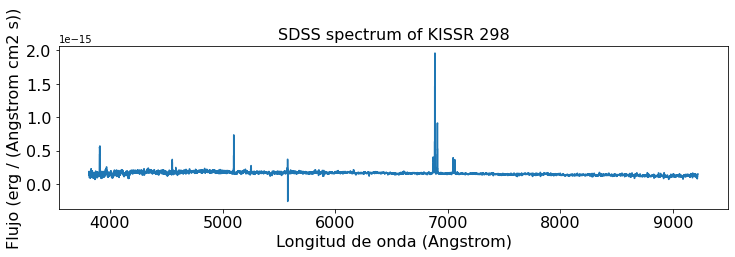

In [22]:
f, ax = plt.subplots(figsize = (12, 3))
ax.step(spec.spectral_axis, spec.flux)
plt.xlabel('Longitud de onda ({})'.format(spec.spectral_axis.unit), fontsize = 16) 
plt.ylabel('Flujo ({})'.format(spec.flux.unit), fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('SDSS spectrum of KISSR 298', fontsize = 16);

# Corrección del espectro por polvo en la Vía Láctea
* Lee el artículo de Wikipedia sobre extinción hasta la sección "Extinction curves of other galaxies" incluída,   aquí: https://en.wikipedia.org/wiki/Extinction_(astronomy).

* Vamos a corregir la luz de las estrellas que se encuentran en la galaxia KISSR 298 por extinción debida al polvo en nuestra Galaxia.

* Para esto, necesitamos el exceso de color que genera el polvo en nuestra Galaxia en la dirección de KISSR 298. 

## Método manual de obtención de extinciones en los filtros B y V. Las extinciones, A$_B$ y A$_V$, tienen unidades de magnitud.
* Para calcular el exceso de color, E(B-V), primero encuentra la extinción Galáctica en las bandas Landolt B y V. Para esto ve a: https://ned.ipac.caltech.edu/ 
* Introduce el nombre del objeto
* Ve a la pestaña de Galactic Extinction
* Ve a la columna "Galactic Extinctions", en donde encontrarás los valores de B y V.
* Asigna a las variables A_B y A_V de abajo, el valor de las extinciones en para observaciones en los filstros Blue y Visible.
* La variable "ebvmw" contiene el exceso de color, E(B-V) debido al polvo en la Vía Láctea (Milky Way).

RESPUESTA:




In [23]:
A_B_manual =0 # extinción Galáctica en la banda B
A_V_manual =0 # extinción Galáctica en la banda V
ebvmw_manual = A_B_manual - A_V_manual # exceso de color E(B-V) de la Vía Láctea (Milky Way)
print('E(B-V)_MW (manual) = ', ebvmw_manual, 'mag')

E(B-V)_MW (manual) =  0 mag


## Método automático de obtención de las extinciones.
* Impotamos el módulo para poder obtener la extinción. 
* La tabla de extinción debida al polvo Galáctico del InfraRed Science Archive (IRSA):
* https://irsa.ipac.caltech.edu/applications/DUST/index.html

In [24]:
from astroquery.irsa_dust import IrsaDust
#Have the `coords` module automatically look up the coordinates from the name of the source 
pos = coords.SkyCoord.from_name("KISSR 298")
table = IrsaDust.get_extinction_table(pos)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: the ``irsa_dust`` module has been moved to astroquery.ipac.irsa.irsa_dust, please update your imports.
  """Entry point for launching an IPython kernel.


* Obtenemos los valores de extinción para los filtros CTIO B y V
*  Esto toma los valores de A_lambda calculados de acuerdo con la prescripción de Schlafly & Finkbeiner (2011), que amplía el Cardelli et al. (1989; CCM89) a longitudes de onda más largas.

In [25]:
A_B = table['A_SandF'][table['Filter_name'] == 'CTIO B'] # extinción Galáctica en la banda B
A_V = table['A_SandF'][table['Filter_name'] == 'CTIO V'] # extinción Galáctica en la banda V
ebvmw = A_B - A_V # exceso de color E(B-V) de la Vía Láctea (Milky Way)
print('E(B-V)_MW = ', ebvmw.quantity)

E(B-V)_MW =  [0.017] mag


* Compara con el valor encontrado manualmente.

In [26]:
print('E(B-V)_MW_manual = ', ebvmw_manual, 'mag')

E(B-V)_MW_manual =  0 mag


* Importamos el paquete necesario para hacer la corrección por polvo.

In [27]:
!pip install git+https://github.com/karllark/dust_extinction.git

  Cloning https://github.com/karllark/dust_extinction.git to /tmp/pip-req-build-zehj777a
  Running command git clone -q https://github.com/karllark/dust_extinction.git /tmp/pip-req-build-zehj777a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dust-extinction: filename=dust_extinction-1.1.dev8+ga13c2a4-py3-none-any.whl size=425077 sha256=d05f23f7ce052251d729597053bc28341fd913304cdf50fd158ff02020234894
  Stored in directory: /tmp/pip-ephem-wheel-cache-f62zljha/wheels/19/8e/ab/bd10dbae88daa1a75e08e945620b29f72ad22f2017787908b9
Successfully built dust-extinction


* Importamos la función que me permite corregir el flujo en cada longitud de onda debida al polvo para el valor de (E-V)_MW dado.

In [28]:
# Importamos el modelo para la ley de extinción de Cardelli, Clayton & Mathis (1989) con A_V = 1 y R_V = 3.1
from dust_extinction.parameter_averages import CCM89
from scipy.optimize import curve_fit

# Cargamos la ley de extinción debido al polvo en la variable 'ext'.

ext = CCM89(Rv=3.1)



* En principio se debe calcular el flujo corregido, uflux, usando el exceso de color ebvmw que obtuvimos arriba. 
* Sin embargo, para la galaxia KISSR 298, la extinción debida al polvo en la Vía Láctea es muy pequeña. 
* Entonces, para ilustrar lo que sucede cuando la extinción es mayor, utilizaremos un valor más grande de E(B-V).

In [29]:
# Flujo corregido (unextinguished flux )
ebvmw=0.2 # en vez de tomar el valor real (E(B-V)=0.017 mag), vamos a usar un valor más grande. Sino, es dificil ver el efecto del polvo en el espectro.
uflux = flux / ext.extinguish(1/wave.to(u.micron), Ebv=ebvmw)

* Graficamos el espectro antes y después de la corrección por enrojecimiento en la Vía Láctea. 

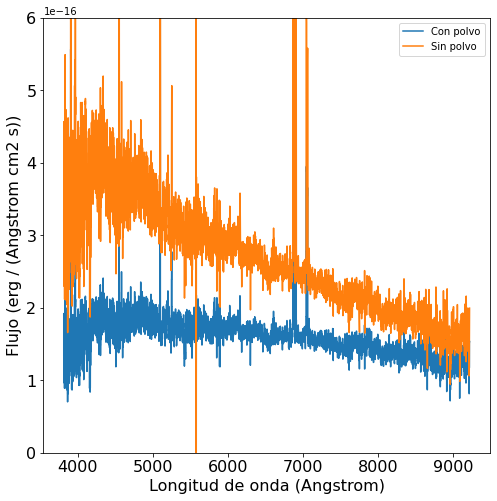

In [30]:
f, ax = plt.subplots(figsize = (8, 8))  

ax.step(spec.spectral_axis, spec.flux, label='Con polvo')
ax.plot(wave,uflux, label='Sin polvo')
plt.xlabel('Longitud de onda ({})'.format(spec.spectral_axis.unit), fontsize = 16) 
plt.ylabel('Flujo ({})'.format(spec.flux.unit), fontsize = 16)
plt.ylim(0,0.6e-15)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'best');

* **¿Cuáles son las diferencias entre el espectro con y sin corrección por polvo en la Vía Láctea y por qué se dan estas diferencias?** 

RESPUESTA:

# Corrección por corrimiento al rojo (redshift, z) de la galaxia.
* La galaxia se está alejando radialmente del observador por lo que su espectro observado está corrido al rojo.
* Vamos entonces a corregir el espectro por corrimiento al rojo.

## Método manual de búsqueda del valor de z en internet.
* Algunos catálogos de objetos astronómicos disponibles en línea incluyen el redshift medido por otros o un algoritmo automático del redshift del objeto.
* **Busca el corrimiento al rojo de la galaxia usando la base de datos de NED:** https://ned.ipac.caltech.edu/ 
* Para esto: introduce el nombre del objeto y ve a la pestaña de "redshift".
* **Asigna el corrimiento al rojo que encontraste a la variable z_manual, abajo.**

INSTRUCCIONES. 






In [31]:
z_manual = 0 #Corrimiento al rojo encontrado manualmente

# Método automático de obtener el corrimiento al rojo.

* Usamos la base de dato de NED.

In [32]:
from astroquery.ned import Ned
result_table = Ned.query_object("KISSR 298")
z = result_table['Redshift']
print(z)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: the ``ned`` module has been moved to astroquery.ipac.ned, please update your imports.
  """Entry point for launching an IPython kernel.


 Redshift 
----------
  0.048977


* Corregimos el vector de longitudes de onda por corrmiento al rojo.

In [33]:
wave_rest = wave / (1 + z)

* Graficamos el espectro antes y después de la corrección por corrimiento al rojo.

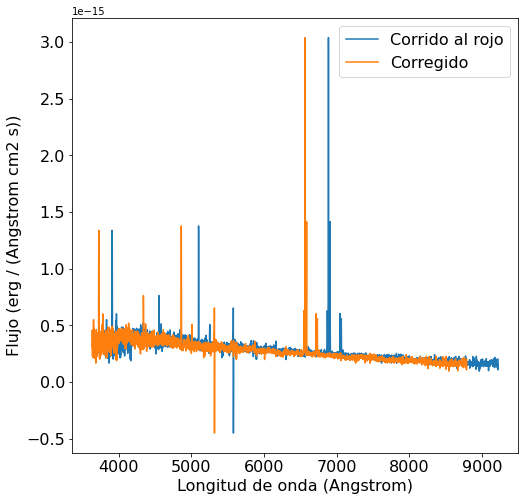

In [34]:
f, ax = plt.subplots(figsize = (8, 8))  

ax.plot(wave, uflux, label="Corrido al rojo")
ax.plot(wave_rest, uflux, label="Corregido")
plt.xlabel('Longitud de onda ({})'.format(spec.spectral_axis.unit), fontsize = 16) 
plt.ylabel('Flujo ({})'.format(spec.flux.unit), fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(prop = {'size': 16});

* ¿Por qué está corrida al rojo la galaxia?

# Medición de líneas espectrales y determinación del redshift.
* Para encontrar el corrimiento al rojo de un espectro, se pueden medir líneas de emisión conocidas y comparar su longitud de onda observada con la esperada si la fuente estuviera en reposo.
* Para obtener una lista de longitudes de onda ópticas y ultravioleta en reposo de líneas espectrales comunes en espectros de SDSS ir a: http://classic.sdss.org/dr6/algorithms/linestable.html
* Para obtener flujos de líneas de emisión, primero debe restar el continuo excluyendo las regiones espectrales con líneas espectrales (en emisión o absorción). En el siguiente ejemplo, ajusto una región que está definida por intervalos de longitud de onda centrados alrededor de las longitudes de onda x0 y x1, que evitan las líneas espectrales. El codigo es:

Text(0, 0.5, 'Flux (erg / (Angstrom cm2 s))')

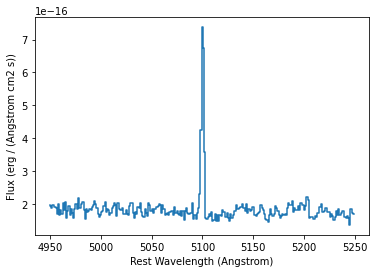

In [37]:
# Cargo paquetes necesarios
from specutils import SpectralRegion
from specutils.fitting import estimate_line_parameters
from specutils.manipulation import extract_region

# Vamos a usar la línea de emisión de Hbeta para determinar el redshift.
# La longitud de onda de Hbeta corrida al rojo es = 4861.325*(1+z).
xhb_redshifted = 4861.325*(1+z) *u.AA
dx1=150 *u.AA 
dx2=150 *u.AA
# Extraigo la región del espectro que abarca desde 150 Ang. a la izq. de Hbeta 
# hasta 150 Ang. a la derecha de Hbeta.
sub_region = SpectralRegion((xhb_redshifted-dx1), (xhb_redshifted+dx2))
sub_spec= extract_region(spec, sub_region)
# Grafico el resultado
f, ax = plt.subplots()  
ax.step(sub_spec.spectral_axis, sub_spec.flux)
plt.xlabel('Rest Wavelength ({})'.format(spec.spectral_axis.unit)) 
plt.ylabel('Flux ({})'.format(spec.flux.unit))

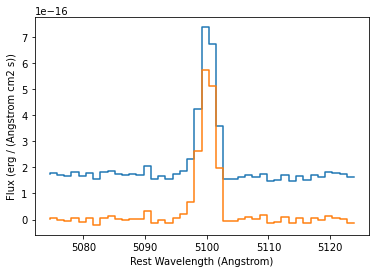

In [38]:
from specutils import SpectralRegion
from specutils.fitting import estimate_line_parameters
from specutils.manipulation import extract_region
# Ahora vamos a ajustar el continuo cerca de Hbeta.
# Para esto, hay evitar la región más cercana a Hbeta y que contiene a Hbeta.
xhb_redshifted = 4861.325*(1+z) *u.AA
dx = 25*u.AA
sub_region = SpectralRegion(xhb_redshifted-dx, xhb_redshifted+dx)
sub_spec = extract_region(spec, sub_region)

f, ax = plt.subplots()  
ax.step(sub_spec.spectral_axis, sub_spec.flux)
plt.xlabel('Rest Wavelength ({})'.format(spec.spectral_axis.unit)) 
plt.ylabel('Flux ({})'.format(spec.flux.unit))

# Realizo la sustracción del continuo y grafico.
from specutils.fitting import fit_generic_continuum
yfit=fit_generic_continuum(sub_spec,
                              exclude_regions=
                           [SpectralRegion(xhb_redshifted-5*u.AA, xhb_redshifted+5*u.AA)])(sub_spec.spectral_axis)

ax.step(sub_spec.spectral_axis, sub_spec.flux-yfit)

In [40]:
from specutils import Spectrum1D
# Cargo el espectro con el continuo sustraido.
spec_cont_sub = Spectrum1D(spectral_axis=sub_spec.spectral_axis, flux=sub_spec.flux-yfit)

# Cargo el paquete necesario para medir propiedades de líneas.
from astropy.modeling import models

# Defino la región espectral dentro de la cual hay líneas que medir.
sub_region = SpectralRegion(5080*u.AA, 5120*u.AA)
sub_spec = extract_region(spec_cont_sub, sub_region)
print(estimate_line_parameters(sub_spec, models.Gaussian1D()))


Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          amplitude               mean        stddev 
    erg / (Angstrom cm2 s)      Angstrom     Angstrom
    ---------------------- ----------------- --------
     5.741018795532815e-16 5100.591942112429      nan


In [46]:
#Determino el redshift medido.
z_medido = (5100.59 - 4861.325)/4861.325

print('z_medido =', z_medido)

z_medido = 0.049218062976657664


**¿Cómo se compara el redshift medido con el encontrado en internet?**